# **Stock Market Data Scrapping**

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf
from datetime import date,timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


# *Define the Dates to Fetch Data*

In [2]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Data will be fetched from {} to {}".format(start_date,end_date))

Data will be fetched from 2022-10-01 to 2023-10-01


## **We are Defining the ticker**

In [3]:
ticker = "GOOGL"

df = yf.download(ticker,start= start_date,end = end_date,progress=False)
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,96.760002,99.290001,96.519997,98.639999,98.639999,27982000
2022-10-04,100.440002,101.839996,100.379997,101.639999,101.639999,28850800
2022-10-05,99.830002,101.930000,98.800003,101.430000,101.430000,22176900
2022-10-06,100.680000,102.930000,100.589996,101.419998,101.419998,22324000
2022-10-07,99.849998,100.529999,98.300003,98.680000,98.680000,27502800


# *Checking Data Information*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-03 to 2023-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


## **Adding Date Column in dataframe**

In [5]:
df.insert(0,"Date",df.index,True)
# df["Date"] = df.index
df.reset_index(drop=True,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


In [7]:
# check data head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-03,96.760002,99.290001,96.519997,98.639999,98.639999,27982000
1,2022-10-04,100.440002,101.839996,100.379997,101.639999,101.639999,28850800
2,2022-10-05,99.830002,101.930000,98.800003,101.430000,101.430000,22176900
3,2022-10-06,100.680000,102.930000,100.589996,101.419998,101.419998,22324000
4,2022-10-07,99.849998,100.529999,98.300003,98.680000,98.680000,27502800


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,250.0,1.086989e+02,1.567027e+01,8.540000e+01,9.539000e+01,1.043900e+02,1.231300e+02,1.380800e+02
High,250.0,1.102015e+02,1.570782e+01,8.652000e+01,9.693000e+01,1.059400e+02,1.247925e+02,1.391600e+02
Low,250.0,1.075219e+02,1.565195e+01,8.334000e+01,9.412000e+01,1.034350e+02,1.221350e+02,1.366200e+02
Close,250.0,1.088857e+02,1.565843e+01,8.343000e+01,9.553250e+01,1.045700e+02,1.235175e+02,1.382100e+02
Adj Close,250.0,1.088857e+02,1.565843e+01,8.343000e+01,9.553250e+01,1.045700e+02,1.235175e+02,1.382100e+02
Volume,250.0,3.338848e+07,1.344921e+07,9.701400e+06,2.526732e+07,2.999065e+07,3.658968e+07,1.194550e+08


## **Lets Make a Plot on Plotly**

In [9]:
fig = px.line(df, x= "Date", y = df.columns, title='Stock Price')
fig.show()

In [10]:
# select columns
df = df[["Date","Close"]]
df.head()

,Date,Close
0,2022-10-03,98.639999
1,2022-10-04,101.639999
2,2022-10-05,101.430000
3,2022-10-06,101.419998
4,2022-10-07,98.680000


# **Lets Plot the Data to see how it looks like using plotly**

In [11]:
fig = px.line(df, x='Date', y='Close', title='{} Stock Price'.format(ticker))
fig.show()

# *Lets Check Stationary on Data*

In [12]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject null hypothesis, Data is Stationary")
    else:
        print("Fail to reject the Null Hypothesis, Data is not Stationary")
    
check_stationarity(df["Close"])
    
    
    

ADF Statistic: -0.655037
p-value: 0.858055
Fail to reject the Null Hypothesis, Data is not Stationary


# **Decompose the Data to see the Trend, Seasonality and Noise**

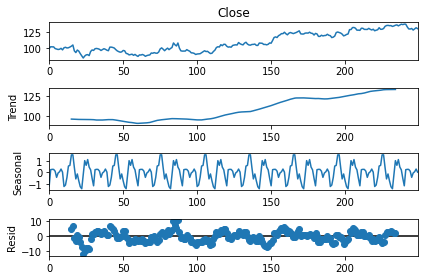

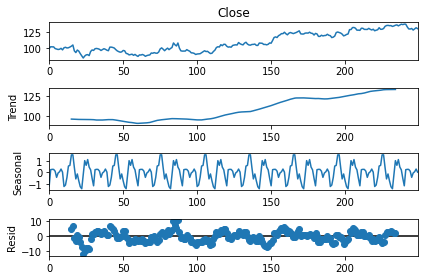

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df["Close"], model='additive', period = 30)
decomposition.plot()

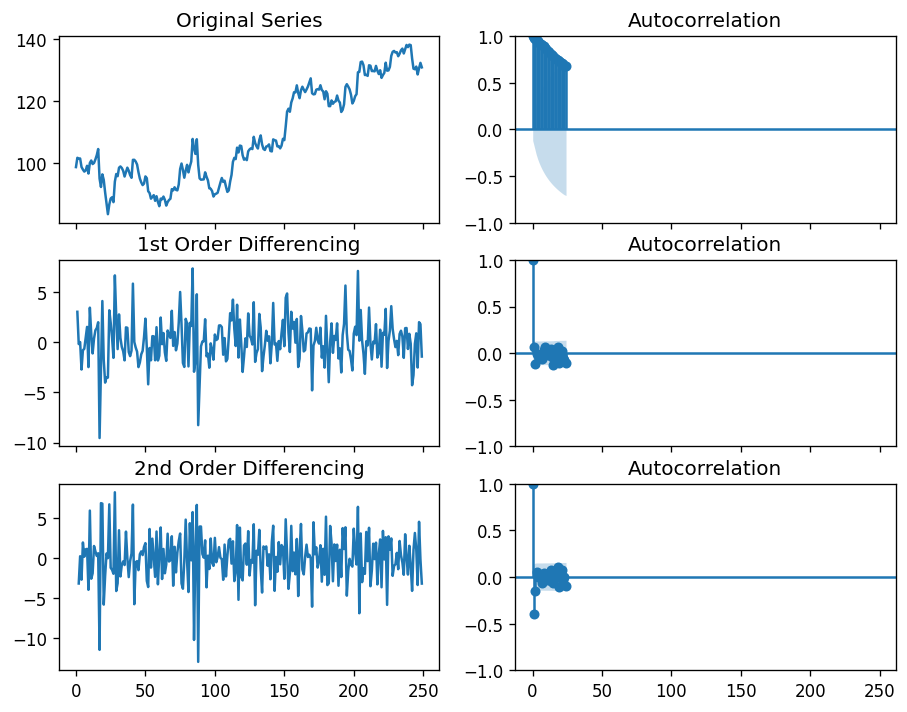

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# original series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df["Close"]); axes[0, 0].set_title('Original Series')
plot_acf(df["Close"], ax=axes[0, 1])

# 1st differencing
axes[1, 0].plot(df["Close"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df["Close"].diff().dropna(), ax=axes[1, 1])


# 2nd differencing
axes[2, 0].plot(df["Close"].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df["Close"].diff().diff().dropna(), ax=axes[2, 1])

plt.show()


#  d = 1

# **Lets Plot Autocorrelation Plot And Find P Value**

           0
0   1.000000
1   0.985052
2   0.968762
3   0.955367
4   0.942879
5   0.929331
6   0.916276
7   0.903989
8   0.891789
9   0.877508
10  0.861379
11  0.845166
12  0.829181
13  0.813667
14  0.797689
15  0.782179
16  0.769531
17  0.759094
18  0.746868
19  0.732349
20  0.720483
21  0.708986
22  0.696403
23  0.684690


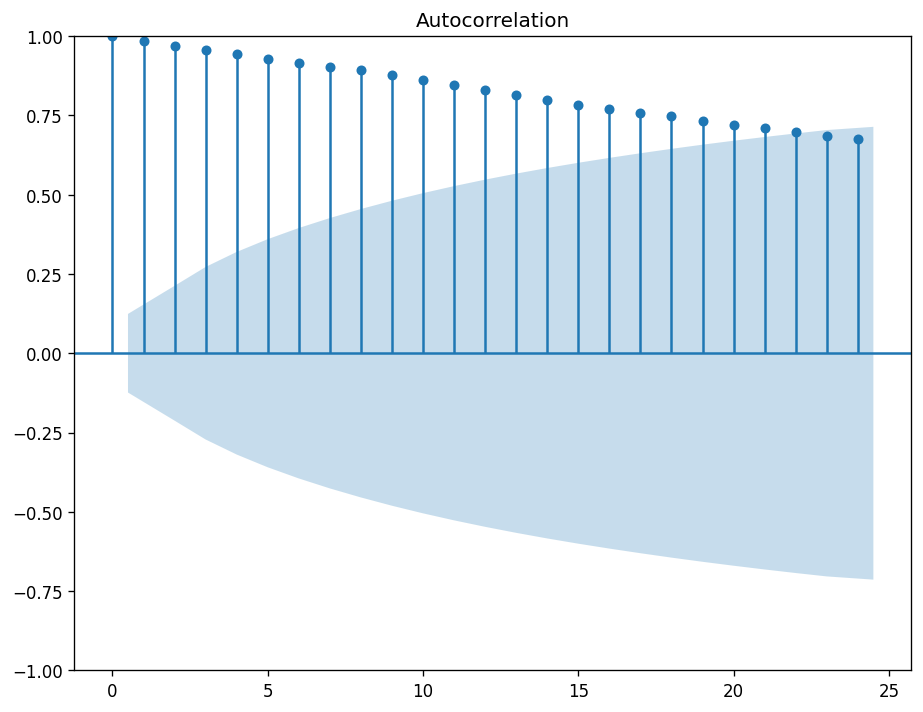

In [15]:
from statsmodels.tsa.stattools import acf, pacf
#pd.plotting.autocorrelation_plot(df["Close"])

#plot_acf(df["Close"],alpha=0.05)
plot_acf(df["Close"],alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df["Close"]))
print(x_acf)

p = 2
## **Lets Find q Value**

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



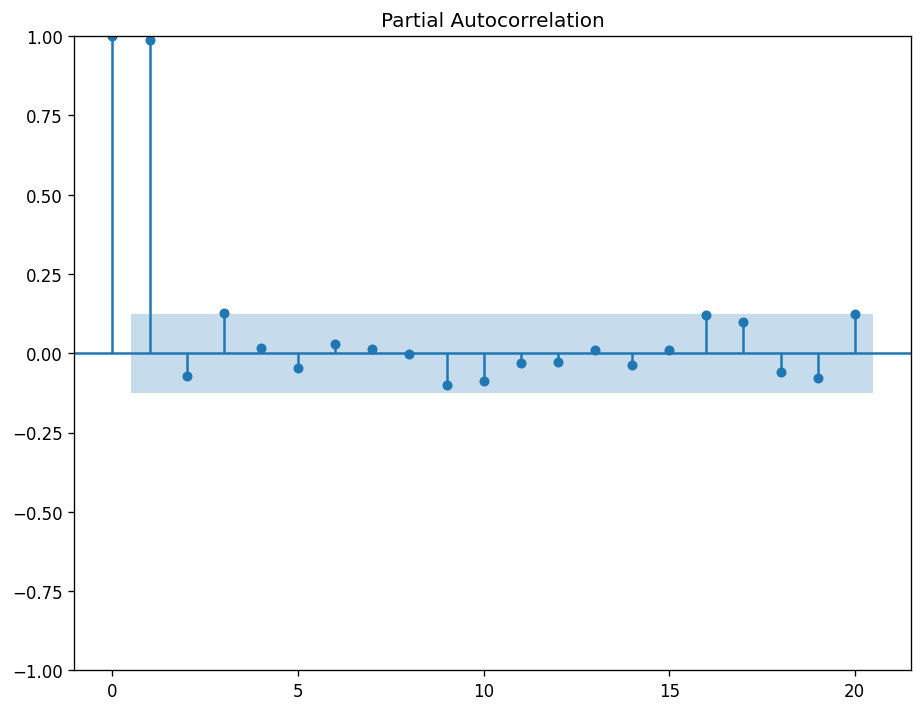

In [16]:
# partial autocorrelation 
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df["Close"],lags=20, alpha=0.05)

plt.show()

# *Lets Define P,d and Q*

In [17]:
p = 2
d = 1
q = 2

# lets run arima with pmdarima
from pmdarima.arima import auto_arima

model= auto_arima(df["Close"], start_p=1, start_q=1,max_p=2,max_q=2,n =12, start_P=0, seasonal=True, d=1,D=1, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1109.773, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1109.010, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1110.037, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1109.732, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1107.850, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.391 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -552.925
Date:                Sun, 01 Oct 2023   AIC                           1107.850
Time:                        02:23:05   BIC                           1111.368
Sample:                             0   HQIC                          1109.266
                                - 250                                       

# **We are Using Arima Model Now**

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -550.402
Date:                Sun, 01 Oct 2023   AIC                           1110.805
Time:                        02:23:05   BIC                           1128.392
Sample:                             0   HQIC                          1117.884
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2891      0.446      0.649      0.517      -0.584       1.163
ar.L2          0.2023      0.363      0.558      0.577      -0.508       0.913
ma.L1         -0.2147      0.427     -0.502      0.6

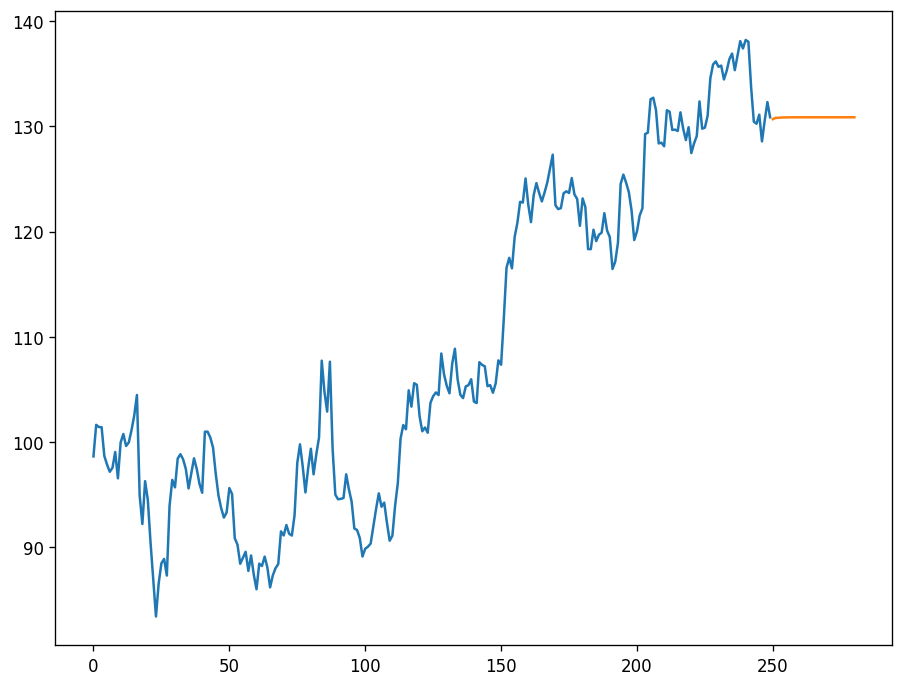

In [18]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2,1,2

model = ARIMA(df["Close"], order=(p,d,q))
model_fit = model.fit()

print(model_fit.summary())

# predict next 30days
forecast = model_fit.predict(len(df["Close"]),len(df["Close"])+30)
print(forecast)

# plot the forecast
plt.Figure(figsize=(10,5))
plt.plot(df["Close"], label="Actual")
plt.plot(forecast, label="Forecast")

#  *We are using SARIMAX  Model*

In [19]:
# lets run sarima
import statsmodels.api as sm
import warnings

p,d,q = 2,1,2

model = sm.tsa.statespace.SARIMAX(df["Close"],order=(p,d,q),seasonal_order=(p,d,q,12))

model = model.fit()
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -538.279
Date:                            Sun, 01 Oct 2023   AIC                           1094.558
Time:                                    02:23:16   BIC                           1125.771
Sample:                                         0   HQIC                          1107.139
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4782      0.371      1.289      0.197      -0.249       1.205
ar.L2          0.3205      0.356   

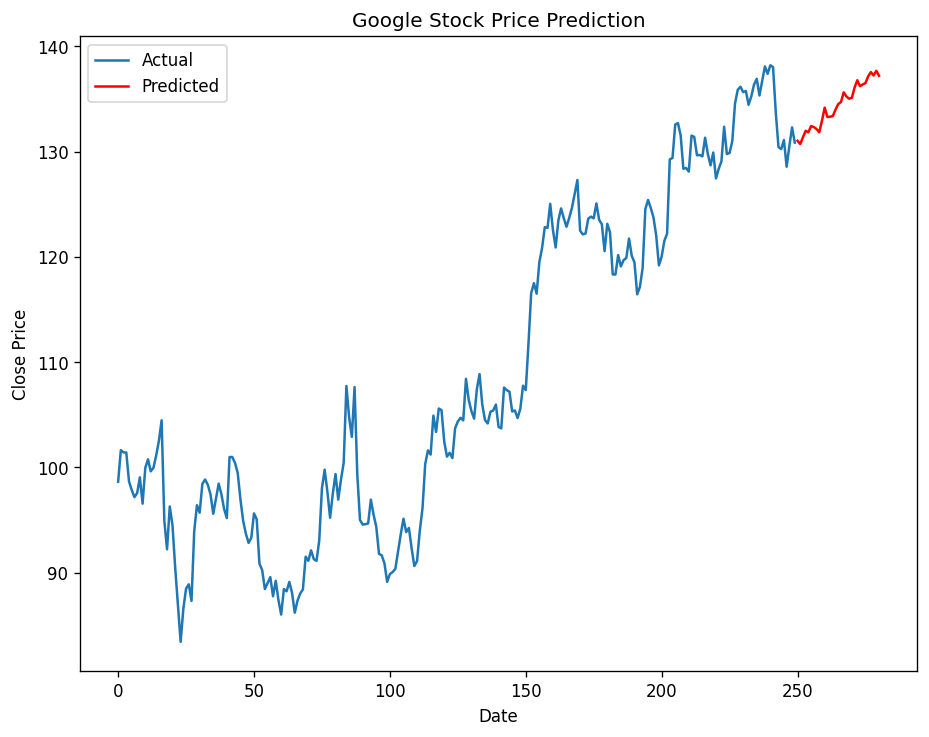

In [20]:
predictions = model.predict(start=len(df["Close"]),end=len(df["Close"])+30)

# Plot the predictions
plt.Figure(figsize=(10,5))
plt.plot(df["Close"], label="Actual")
plt.plot(predictions, color = "red", label="Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Google Stock Price Prediction")
# change legend location
plt.legend(loc="upper left")
plt.show()

## **Lets Update P,d,Q and run SARIMA**

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -537.714
Date:                            Sun, 01 Oct 2023   AIC                           1097.428
Time:                                    02:23:37   BIC                           1135.577
Sample:                                         0   HQIC                          1112.804
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5663      0.692      0.818      0.413      -0.790       1.923
ar.L2          0.2155      0.589   

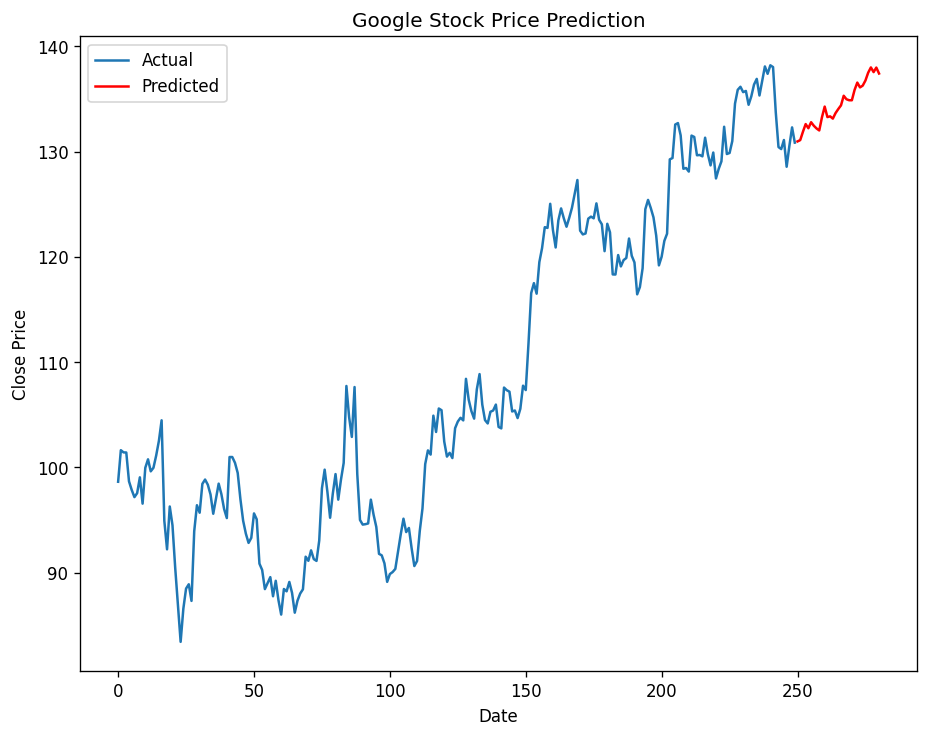

In [21]:
# lets update p,d,q
# lets run sarima

import statsmodels.api as sm
import warnings

p,d,q = 3,1,2

model = sm.tsa.statespace.SARIMAX(df["Close"],order=(p,d,q),seasonal_order=(p,d,q,12))

model = model.fit()
print(model.summary())

predictions = model.predict(start=len(df["Close"]),end=len(df["Close"])+30)

# Plot the predictions
plt.Figure(figsize=(10,5))
plt.plot(df["Close"], label="Actual")
plt.plot(predictions, color = "red", label="Predicted")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Google Stock Price Prediction")
# change legend location
plt.legend(loc="upper left")
plt.show()
